# ADHD

In [1]:
import sys 
import numpy as np
import nibabel as nib
from nilearn import image, plotting
from nilearn import datasets
from nilearn.input_data import NiftiMasker,  MultiNiftiMasker
from scipy import stats
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns 
import os
import pandas as pd
%matplotlib inline 
%autosave 30
import nitime
import re
from collections import Counter
from statistics import mean
import operator


# Import the time-series objects:
from nitime.timeseries import TimeSeries

# Import the analysis objects:
from nitime.analysis import SpectralAnalyzer, FilterAnalyzer, NormalizationAnalyzer


Autosaving every 30 seconds


In [2]:
img = nib.load("./nd/sfnwmrda0010001_session_1_rest_1.nii")

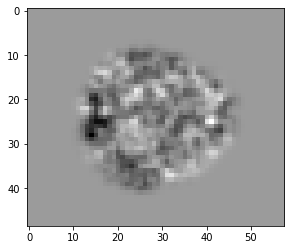

In [3]:
first_vol = img.get_data()[:, :, :, 0]
plt.imshow(first_vol[:, :, 30], cmap='gray')

In [4]:
# img2 = image.load_img("./nd/sfnwmrda0010001_session_1_rest_1.nii")
# plotting.plot_epi(image.index_img(0, img2))
# plotting.show()

In [5]:
aal = pd.read_csv('./aal_files/sfnwmrda1000804_session_1_rest_1_aal_TCs.1D',sep='\t', lineterminator='\n')


In [6]:
aal.shape

(172, 118)

In [7]:
aal

,File,Sub-brick,Mean_2001,Mean_2002,Mean_2101,Mean_2102,Mean_2111,Mean_2112,Mean_2201,Mean_2202,...,Mean_9081,Mean_9082,Mean_9100,Mean_9110,Mean_9120,Mean_9130,Mean_9140,Mean_9150,Mean_9160,Mean_9170
0,sfnwmrda1000804_session_1_rest_1.nii.gz,0[?],0.042841,0.001586,0.011241,-0.009533,0.048670,0.026370,0.119680,0.067354,...,0.024132,0.063037,0.069923,-0.252813,-0.181242,-0.023531,-0.040215,-0.030786,0.033420,0.293370
1,sfnwmrda1000804_session_1_rest_1.nii.gz,1[?],0.041374,-0.014481,-0.001965,-0.029556,0.036024,0.050321,0.129818,0.107822,...,-0.033686,0.030707,0.054426,-0.321232,-0.243922,-0.065716,0.068373,-0.036856,-0.046887,0.096781
2,sfnwmrda1000804_session_1_rest_1.nii.gz,2[?],0.014814,-0.027789,-0.019125,-0.038128,0.006147,0.081418,0.105368,0.131340,...,-0.070628,-0.007040,-0.009817,-0.284935,-0.246733,-0.081442,0.170175,-0.049156,-0.137474,-0.105761
3,sfnwmrda1000804_session_1_rest_1.nii.gz,3[?],-0.031173,-0.028024,-0.030319,-0.024380,-0.019698,0.105274,0.052648,0.124446,...,-0.065221,-0.023812,-0.103188,-0.171259,-0.189273,-0.041281,0.208157,-0.056872,-0.180116,-0.153660
4,sfnwmrda1000804_session_1_rest_1.nii.gz,4[?],-0.084363,-0.019222,-0.034411,0.009884,-0.024709,0.113089,-0.010140,0.092209,...,-0.023726,-0.011106,-0.177280,-0.039313,-0.094078,0.046352,0.162014,-0.048809,-0.146641,-0.009170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,sfnwmrda1000804_session_1_rest_1.nii.gz,167[?],0.089558,-0.028446,0.093540,0.072043,-0.076304,-0.016148,0.088779,0.006799,...,0.184528,0.024753,-0.225985,0.010637,0.056326,-0.207121,-0.182897,0.007463,-0.011796,0.409553
168,sfnwmrda1000804_session_1_rest_1.nii.gz,168[?],0.035688,-0.084122,0.100537,0.121463,-0.004982,0.086993,0.095617,0.071456,...,0.088608,-0.041673,-0.484395,-0.040110,-0.013525,-0.250830,-0.192860,-0.037851,-0.057808,0.218000
169,sfnwmrda1000804_session_1_rest_1.nii.gz,169[?],-0.023865,-0.092399,0.075475,0.129984,0.080186,0.168378,0.064090,0.101096,...,-0.002556,-0.053450,-0.545830,-0.119924,-0.093665,-0.207241,-0.126898,-0.062981,-0.092389,0.002837
170,sfnwmrda1000804_session_1_rest_1.nii.gz,170[?],-0.056386,-0.054364,0.043972,0.095831,0.145334,0.188426,0.016249,0.077309,...,-0.043297,-0.023857,-0.432267,-0.212928,-0.164858,-0.109193,-0.027019,-0.059731,-0.097216,-0.106179


In [8]:
def graphIt(t):
    f, ax = plt.subplots(1,1, figsize=(14,5))
    reg = list(t.columns.values)[2:]
    x = np.arange(0, 172, 1)
    for r in reg: 
        ax.plot(x, t[r])
    print(len(reg))

116


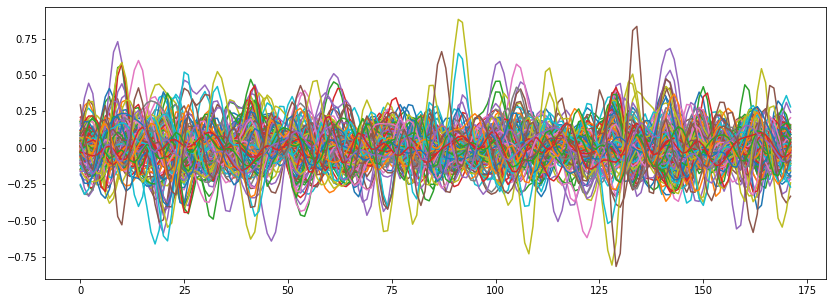

In [9]:
#x = np.arange(0, 172, 1)
#y = np.array(aal['Mean_2001  '])
graphIt(aal)

In [10]:
typ = {'ScanDir ID': str}
p_data = pd.read_csv("./phenotypic_info/NYU_phenotypic.csv",usecols=["ScanDir ID", "Site", "Gender","Age","DX"],dtype=typ)

df1 = pd.read_csv("./phenotypic_info/Peking_1_phenotypic.csv",usecols=["ScanDir ID", "Site", "Gender","Age","DX"],dtype=typ)
p_data = p_data.append(df1)

df2 = pd.read_csv("./phenotypic_info/Peking_2_phenotypic.csv",usecols=["ScanDir ID", "Site", "Gender","Age","DX"],dtype=typ)
p_data = p_data.append(df2)

df3 = pd.read_csv("./phenotypic_info/Peking_3_phenotypic.csv",usecols=["ScanDir ID", "Site", "Gender","Age","DX"],dtype=typ)
p_data = p_data.append(df3)

df4 = pd.read_csv("./phenotypic_info/NeuroIMAGE_phenotypic.csv",usecols=["ScanDir ID", "Site", "Gender","Age","DX"],dtype=typ)
p_data = p_data.append(df4)

p_data

,ScanDir ID,Site,Gender,Age,DX
0,1000804,5,1.0,7.29,0
1,1023964,5,1.0,8.29,3
2,1057962,5,1.0,8.78,1
3,1099481,5,0.0,8.04,1
4,1127915,5,0.0,12.44,0
...,...,...,...,...,...
43,7504392,4,0.0,18.01,1
44,8387093,4,1.0,18.59,2
45,8409791,4,1.0,17.59,0
46,8991934,4,0.0,17.01,0


In [11]:
p_data = p_data.rename(columns={'ScanDir ID':'ID'})
for entry in p_data.iterrows():
    if len(entry[1]['ID']) < 7: 
        p_data.loc[p_data['ID'] == entry[1]['ID'], 'ID'] = '00'+entry[1]['ID']

In [12]:
for entry in p_data.iterrows():
    if len(entry[1]['ID']) < 7: 
        print('hi')
    if entry[1]['ID'] == '0010001':
        print(entry[1])

ID        0010001
Site            5
Gender          0
Age         11.17
DX              3
Name: 93, dtype: object


In [13]:
def timeThing(ali):
    all_regions_timeseries = []
    column_names = list(ali.columns.values)[2:92]
    for r in column_names:
        timeslice = list(ali[r])
        all_regions_timeseries.append(timeslice[(len(timeslice)-172):])
    return all_regions_timeseries

column_names = list(pd.read_csv('./aal_files/sfnwmrda1000804_session_1_rest_1_aal_TCs.1D',sep='\t', lineterminator='\n').columns.values)[2:92]

In [14]:
column_names

['Mean_2001  ',
 'Mean_2002  ',
 'Mean_2101  ',
 'Mean_2102  ',
 'Mean_2111  ',
 'Mean_2112  ',
 'Mean_2201  ',
 'Mean_2202  ',
 'Mean_2211  ',
 'Mean_2212  ',
 'Mean_2301  ',
 'Mean_2302  ',
 'Mean_2311  ',
 'Mean_2312  ',
 'Mean_2321  ',
 'Mean_2322  ',
 'Mean_2331  ',
 'Mean_2332  ',
 'Mean_2401  ',
 'Mean_2402  ',
 'Mean_2501  ',
 'Mean_2502  ',
 'Mean_2601  ',
 'Mean_2602  ',
 'Mean_2611  ',
 'Mean_2612  ',
 'Mean_2701  ',
 'Mean_2702  ',
 'Mean_3001  ',
 'Mean_3002  ',
 'Mean_4001  ',
 'Mean_4002  ',
 'Mean_4011  ',
 'Mean_4012  ',
 'Mean_4021  ',
 'Mean_4022  ',
 'Mean_4101  ',
 'Mean_4102  ',
 'Mean_4111  ',
 'Mean_4112  ',
 'Mean_4201  ',
 'Mean_4202  ',
 'Mean_5001  ',
 'Mean_5002  ',
 'Mean_5011  ',
 'Mean_5012  ',
 'Mean_5021  ',
 'Mean_5022  ',
 'Mean_5101  ',
 'Mean_5102  ',
 'Mean_5201  ',
 'Mean_5202  ',
 'Mean_5301  ',
 'Mean_5302  ',
 'Mean_5401  ',
 'Mean_5402  ',
 'Mean_6001  ',
 'Mean_6002  ',
 'Mean_6101  ',
 'Mean_6102  ',
 'Mean_6201  ',
 'Mean_6202  ',
 'Mean_6

In [15]:
id_to_arr = {}
ids = p_data['ID']
for eyed in ids:
    filename = './aal_files/sfnwmrda' + eyed + '_session_1_rest_1_aal_TCs.1D'
    try:
        al = pd.read_csv(filename,sep='\t', lineterminator='\n')
        tt = timeThing(al)
        id_to_arr[eyed] = tt
    except:
        print(filename + " not found in filesystem")
p_data

./aal_files/sfnwmrda0010016_session_1_rest_1_aal_TCs.1D not found in filesystem
./aal_files/sfnwmrda0010055_session_1_rest_1_aal_TCs.1D not found in filesystem
./aal_files/sfnwmrda0010098_session_1_rest_1_aal_TCs.1D not found in filesystem
./aal_files/sfnwmrda0010105_session_1_rest_1_aal_TCs.1D not found in filesystem
./aal_files/sfnwmrda0010027_session_1_rest_1_aal_TCs.1D not found in filesystem
./aal_files/sfnwmrda0010127_session_1_rest_1_aal_TCs.1D not found in filesystem


,ID,Site,Gender,Age,DX
0,1000804,5,1.0,7.29,0
1,1023964,5,1.0,8.29,3
2,1057962,5,1.0,8.78,1
3,1099481,5,0.0,8.04,1
4,1127915,5,0.0,12.44,0
...,...,...,...,...,...
43,7504392,4,0.0,18.01,1
44,8387093,4,1.0,18.59,2
45,8409791,4,1.0,17.59,0
46,8991934,4,0.0,17.01,0


In [16]:
len(id_to_arr)

458

In [17]:
aal_df = pd.DataFrame.from_dict(id_to_arr,orient='index',columns=column_names)

In [18]:
aal_df

,Mean_2001,Mean_2002,Mean_2101,Mean_2102,Mean_2111,Mean_2112,Mean_2201,Mean_2202,Mean_2211,Mean_2212,...,Mean_8111,Mean_8112,Mean_8121,Mean_8122,Mean_8201,Mean_8202,Mean_8211,Mean_8212,Mean_8301,Mean_8302
1000804,"[0.042841000000000004, 0.041374, 0.01481399999...","[0.001586, -0.014481, -0.027788999999999998, -...","[0.011241, -0.0019649999999999997, -0.019125, ...","[-0.009533, -0.029556, -0.038127999999999995, ...","[0.04867, 0.036024, 0.006147, -0.019698, -0.02...","[0.026369999999999998, 0.050321, 0.08141799999...","[0.11968, 0.12981800000000002, 0.105368, 0.052...","[0.067354, 0.107822, 0.13134, 0.124446, 0.0922...","[0.17410799999999998, 0.199596, 0.165279, 0.08...","[0.096863, 0.129175, 0.139352, 0.112701, 0.061...",...,"[0.124221, 0.17882699999999999, 0.177174, 0.13...","[0.013366, 0.011744, 0.010673, 0.0172020000000...","[-0.15071500000000002, -0.06852899999999999, -...","[-0.112594, 0.010868000000000001, 0.101325, 0....","[-0.05596, -0.113651, -0.147202, -0.132735, -0...","[0.009147, -0.038392, -0.086449, -0.100452, -0...","[-0.161151, -0.191004, -0.19276600000000002, -...","[-0.261189, -0.319844, -0.323071, -0.282594, -...","[-0.152114, -0.200598, -0.22670300000000002, -...","[-0.125669, -0.166533, -0.181092, -0.165279, -..."
1023964,"[-0.011403, 0.038232, 0.09084500000000001, 0.1...","[0.025129, 0.060987, 0.064648, 0.039724, 0.015...","[-0.186355, -0.21379299999999998, -0.194638, -...","[-0.05625700000000001, -0.075449, -0.090119, -...","[-0.070891, -0.142091, -0.199021, -0.202548, -...","[-0.041019, 0.015288999999999999, 0.086449, 0....","[-0.141502, -0.15425, -0.117941, -0.0489649999...","[-0.018653, -0.003042, 0.028273000000000003, 0...","[-0.125414, -0.14358800000000002, -0.119426999...","[-0.115842, -0.065834, 0.0050409999999999995, ...",...,"[0.166384, 0.21709499999999998, 0.191990000000...","[0.087453, 0.10528499999999999, 0.074752, 0.00...","[0.095256, 0.19998, 0.24523699999999998, 0.206...","[0.176387, 0.268102, 0.271845, 0.186643, 0.059...","[-0.099354, -0.10943800000000001, -0.119959, -...","[-0.032921, -0.073492, -0.12444000000000001, -...","[-0.156904, -0.21183200000000002, -0.218462, -...","[-0.005697, -0.06093099999999999, -0.144551, -...","[-0.060573, -0.07474199999999999, -0.075773000...","[-0.058078, -0.066045, -0.06902, -0.064068, -0..."
1057962,"[-0.000113, -0.029542000000000002, -0.07153999...","[0.06590900000000001, 0.047104, 0.003922, -0.0...","[0.00857, 0.015391, 0.014119, 0.007531, -0.000...","[-0.023322, 0.00483, 0.047199, 0.084074, 0.095...","[-0.020503, 0.028674, 0.083724, 0.104224, 0.07...","[0.002456, -0.010805, -0.031955000000000004, -...","[0.100849, 0.110551, 0.08283099999999999, 0.03...","[0.024508000000000002, 0.02339, -0.00384399999...","[-0.051561, -0.055126999999999995, -0.058551, ...","[-0.064302, -0.066726, -0.064497, -0.072404, -...",...,"[0.12485999999999998, 0.180112, 0.193552, 0.14...","[0.067424, 0.050569, 0.02078, -0.0054, -0.0182...","[-0.029347, -0.037094, -0.037892, -0.040974000...","[-0.10485799999999999, -0.101609, -0.054294000...","[-0.039671, -0.06788999999999999, -0.084297, -...","[-0.029475, -0.046081, -0.042519, -0.015174000...","[-0.14010999999999998, -0.125195, -0.058855999...","[-0.07058500000000001, -0.05706, -0.0038130000...","[-0.009151000000000001, -0.015622, -0.02366699...","[0.011549, 0.007908, -0.006461, -0.027488, -0...."
1099481,"[-0.0053549999999999995, 0.017061, 0.016496, -...","[-0.027260000000000003, -0.029118, -0.02173300...","[0.002502, -0.006823999999999999, -0.026019999...","[-0.018096, -0.005951, -0.009811, -0.042525, -...","[-0.005801, 0.027164999999999998, 0.0796549999...","[-0.12853599999999998, -0.161486, -0.140618, -...","[-0.040544, -0.057571000000000004, -0.05975900...","[0.025363999999999998, 0.031039999999999998, 0...","[-0.068088, -0.067406, -0.029388, 0.0235949999...","[0.0032020000000000004, -0.05294, -0.135088, -...",...,"[-0.108569, -0.13585899999999998, -0.062002999...","[-0.105722, -0.12010499999999999, -0.049437, 0...","[-

In [19]:
p_data = p_data.set_index('ID')

In [20]:
all_data = pd.concat([p_data, aal_df], axis=1, join='outer',sort=False)

In [21]:
all_data

,Site,Gender,Age,DX,Mean_2001,Mean_2002,Mean_2101,Mean_2102,Mean_2111,Mean_2112,...,Mean_8111,Mean_8112,Mean_8121,Mean_8122,Mean_8201,Mean_8202,Mean_8211,Mean_8212,Mean_8301,Mean_8302
1000804,5,1.0,7.29,0,"[0.042841000000000004, 0.041374, 0.01481399999...","[0.001586, -0.014481, -0.027788999999999998, -...","[0.011241, -0.0019649999999999997, -0.019125, ...","[-0.009533, -0.029556, -0.038127999999999995, ...","[0.04867, 0.036024, 0.006147, -0.019698, -0.02...","[0.026369999999999998, 0.050321, 0.08141799999...",...,"[0.124221, 0.17882699999999999, 0.177174, 0.13...","[0.013366, 0.011744, 0.010673, 0.0172020000000...","[-0.15071500000000002, -0.06852899999999999, -...","[-0.112594, 0.010868000000000001, 0.101325, 0....","[-0.05596, -0.113651, -0.147202, -0.132735, -0...","[0.009147, -0.038392, -0.086449, -0.100452, -0...","[-0.161151, -0.191004, -0.19276600000000002, -...","[-0.261189, -0.319844, -0.323071, -0.282594, -...","[-0.152114, -0.200598, -0.22670300000000002, -...","[-0.125669, -0.166533, -0.181092, -0.165279, -..."
1023964,5,1.0,8.29,3,"[-0.011403, 0.038232, 0.09084500000000001, 0.1...","[0.025129, 0.060987, 0.064648, 0.039724, 0.015...","[-0.186355, -0.21379299999999998, -0.194638, -...","[-0.05625700000000001, -0.075449, -0.090119, -...","[-0.070891, -0.142091, -0.199021, -0.202548, -...","[-0.041019, 0.015288999999999999, 0.086449, 0....",...,"[0.166384, 0.21709499999999998, 0.191990000000...","[0.087453, 0.10528499999999999, 0.074752, 0.00...","[0.095256, 0.19998, 0.24523699999999998, 0.206...","[0.176387, 0.268102, 0.271845, 0.186643, 0.059...","[-0.099354, -0.10943800000000001, -0.119959, -...","[-0.032921, -0.073492, -0.12444000000000001, -...","[-0.156904, -0.21183200000000002, -0.218462, -...","[-0.005697, -0.06093099999999999, -0.144551, -...","[-0.060573, -0.07474199999999999, -0.075773000...","[-0.058078, -0.066045, -0.06902, -0.064068, -0..."
1057962,5,1.0,8.78,1,"[-0.000113, -0.029542000000000002, -0.07153999...","[0.06590900000000001, 0.047104, 0.003922, -0.0...","[0.00857, 0.015391, 0.014119, 0.007531, -0.000...","[-0.023322, 0.00483, 0.047199, 0.084074, 0.095...","[-0.020503, 0.028674, 0.083724, 0.104224, 0.07...","[0.002456, -0.010805, -0.031955000000000004, -...",...,"[0.12485999999999998, 0.180112, 0.193552, 0.14...","[0.067424, 0.050569, 0.02078, -0.0054, -0.0182...","[-0.029347, -0.037094, -0.037892, -0.040974000...","[-0.10485799999999999, -0.101609, -0.054294000...","[-0.039671, -0.06788999999999999, -0.084297, -...","[-0.029475, -0.046081, -0.042519, -0.015174000...","[-0.14010999999999998, -0.125195, -0.058855999...","[-0.07058500000000001, -0.05706, -0.0038130000...","[-0.009151000000000001, -0.015622, -0.02366699...","[0.011549, 0.007908, -0.006461, -0.027488, -0...."
1099481,5,0.0,8.04,1,"[-0.0053549999999999995, 0.017061, 0.016496, -...","[-0.027260000000000003, -0.029118, -0.02173300...","[0.002502, -0.006823999999999999, -0.026019999...","[-0.018096, -0.005951, -0.009811, -0.042525, -...","[-0.005801, 0.027164999999999998, 0.0796549999...","[-0.12853599999999998, -0.161486, -0.140618, -...",...,"[-0.108569, -0.13585899999999998, -0.062002999...","[-0.105722, -0.12010499999999999, -0.049437, 0...","[-0.00303, -0.064415, -0.099089, -0.048068, 0....","[0.021376, 0.031575, 0.055604999999999995, 0.1...","[-0.029199, -0.056316, -0.053988999999999995, ...","[-0.122978, -0.121103, -0.074363, -0.008006000...","[0.037225, 0.051829999999999994, 0.07787899999...","[-0.028745, -0.004021, 0.027763, 0.061622, 0.0...","[0.018691, 0.016622, 0.009609, 0.0058390000000...","[0.028651, 0.10392, 0.16800199999999998, 0.177..."
1127915,5,0.0,12.44,0,"[0.077553, 0.071517, 0.047556, 0.020229, 0.000...","[0.070779, 0.066885, 0.051459000000000005, 0.0...","[-0.026682, -0.035129, -0.026854000000000003, ...","[0.013158000000000001, 0.008265, -0.004501, -0...","[-0.058628, -0.085599, -0.08608500000000001, -...","[0.048378, -0.002328, -0.08326599999999999, -0...",...,"[0.023099, 0.024952000000000002, -0.0123959999...

In [22]:
all_data = all_data.dropna()

In [23]:
all_data

,Site,Gender,Age,DX,Mean_2001,Mean_2002,Mean_2101,Mean_2102,Mean_2111,Mean_2112,...,Mean_8111,Mean_8112,Mean_8121,Mean_8122,Mean_8201,Mean_8202,Mean_8211,Mean_8212,Mean_8301,Mean_8302
1000804,5,1.0,7.29,0,"[0.042841000000000004, 0.041374, 0.01481399999...","[0.001586, -0.014481, -0.027788999999999998, -...","[0.011241, -0.0019649999999999997, -0.019125, ...","[-0.009533, -0.029556, -0.038127999999999995, ...","[0.04867, 0.036024, 0.006147, -0.019698, -0.02...","[0.026369999999999998, 0.050321, 0.08141799999...",...,"[0.124221, 0.17882699999999999, 0.177174, 0.13...","[0.013366, 0.011744, 0.010673, 0.0172020000000...","[-0.15071500000000002, -0.06852899999999999, -...","[-0.112594, 0.010868000000000001, 0.101325, 0....","[-0.05596, -0.113651, -0.147202, -0.132735, -0...","[0.009147, -0.038392, -0.086449, -0.100452, -0...","[-0.161151, -0.191004, -0.19276600000000002, -...","[-0.261189, -0.319844, -0.323071, -0.282594, -...","[-0.152114, -0.200598, -0.22670300000000002, -...","[-0.125669, -0.166533, -0.181092, -0.165279, -..."
1023964,5,1.0,8.29,3,"[-0.011403, 0.038232, 0.09084500000000001, 0.1...","[0.025129, 0.060987, 0.064648, 0.039724, 0.015...","[-0.186355, -0.21379299999999998, -0.194638, -...","[-0.05625700000000001, -0.075449, -0.090119, -...","[-0.070891, -0.142091, -0.199021, -0.202548, -...","[-0.041019, 0.015288999999999999, 0.086449, 0....",...,"[0.166384, 0.21709499999999998, 0.191990000000...","[0.087453, 0.10528499999999999, 0.074752, 0.00...","[0.095256, 0.19998, 0.24523699999999998, 0.206...","[0.176387, 0.268102, 0.271845, 0.186643, 0.059...","[-0.099354, -0.10943800000000001, -0.119959, -...","[-0.032921, -0.073492, -0.12444000000000001, -...","[-0.156904, -0.21183200000000002, -0.218462, -...","[-0.005697, -0.06093099999999999, -0.144551, -...","[-0.060573, -0.07474199999999999, -0.075773000...","[-0.058078, -0.066045, -0.06902, -0.064068, -0..."
1057962,5,1.0,8.78,1,"[-0.000113, -0.029542000000000002, -0.07153999...","[0.06590900000000001, 0.047104, 0.003922, -0.0...","[0.00857, 0.015391, 0.014119, 0.007531, -0.000...","[-0.023322, 0.00483, 0.047199, 0.084074, 0.095...","[-0.020503, 0.028674, 0.083724, 0.104224, 0.07...","[0.002456, -0.010805, -0.031955000000000004, -...",...,"[0.12485999999999998, 0.180112, 0.193552, 0.14...","[0.067424, 0.050569, 0.02078, -0.0054, -0.0182...","[-0.029347, -0.037094, -0.037892, -0.040974000...","[-0.10485799999999999, -0.101609, -0.054294000...","[-0.039671, -0.06788999999999999, -0.084297, -...","[-0.029475, -0.046081, -0.042519, -0.015174000...","[-0.14010999999999998, -0.125195, -0.058855999...","[-0.07058500000000001, -0.05706, -0.0038130000...","[-0.009151000000000001, -0.015622, -0.02366699...","[0.011549, 0.007908, -0.006461, -0.027488, -0...."
1099481,5,0.0,8.04,1,"[-0.0053549999999999995, 0.017061, 0.016496, -...","[-0.027260000000000003, -0.029118, -0.02173300...","[0.002502, -0.006823999999999999, -0.026019999...","[-0.018096, -0.005951, -0.009811, -0.042525, -...","[-0.005801, 0.027164999999999998, 0.0796549999...","[-0.12853599999999998, -0.161486, -0.140618, -...",...,"[-0.108569, -0.13585899999999998, -0.062002999...","[-0.105722, -0.12010499999999999, -0.049437, 0...","[-0.00303, -0.064415, -0.099089, -0.048068, 0....","[0.021376, 0.031575, 0.055604999999999995, 0.1...","[-0.029199, -0.056316, -0.053988999999999995, ...","[-0.122978, -0.121103, -0.074363, -0.008006000...","[0.037225, 0.051829999999999994, 0.07787899999...","[-0.028745, -0.004021, 0.027763, 0.061622, 0.0...","[0.018691, 0.016622, 0.009609, 0.0058390000000...","[0.028651, 0.10392, 0.16800199999999998, 0.177..."
1127915,5,0.0,12.44,0,"[0.077553, 0.071517, 0.047556, 0.020229, 0.000...","[0.070779, 0.066885, 0.051459000000000005, 0.0...","[-0.026682, -0.035129, -0.026854000000000003, ...","[0.013158000000000001, 0.008265, -0.004501, -0...","[-0.058628, -0.085599, -0.08608500000000001, -...","[0.048378, -0.002328, -0.08326599999999999, -0...",...,"[0.023099, 0.024952000000000002, -0.0123959999...

In [24]:
def avges(dx, reg):
    scans = all_data[all_data['DX'] == dx][reg]
    i = 0
    avg = np.zeros(172)   
    for val in scans:
        avg = np.add(val, avg)
    avg = np.true_divide(avg,len(scans))
    return avg

In [25]:
avges(0,'Mean_2001  ')
non_adhd = []
adhd_1 = []
adhd_2 = []
adhd_3 = []

for i in range(4):
    for reg in column_names:
        if(i == 0):
            non_adhd.append(avges(i,reg))
        elif(i == 1):
            adhd_1.append(avges(i,reg))
        elif(i == 2):
            adhd_2.append(avges(i,reg))
        elif (i == 3):
            adhd_3.append(avges(i,reg))

In [26]:
len(non_adhd)

90

In [27]:
len(adhd_1)

90

In [28]:
len(adhd_2)

90

In [29]:
len(adhd_3)

90

In [30]:
dif_array_1 = []
dif_array_2 = []
dif_array_3 = []
for i in range(len(non_adhd)): 
    dif_array_1.append(np.mean(np.abs(np.subtract(non_adhd[i], adhd_1[i]))))
    dif_array_2.append(np.mean(np.abs(np.subtract(non_adhd[i], adhd_2[i]))))
    dif_array_3.append(np.mean(np.abs(np.subtract(non_adhd[i], adhd_3[i]))))

In [31]:
dif_array_1

[0.08678291003616637,
 0.08625720075033251,
 0.07043600056463563,
 0.07176498516238994,
 0.15541549487148404,
 0.18389244142364042,
 0.09109311859079812,
 0.0896058927534511,
 0.21140135181128678,
 0.19652046783514704,
 0.11771543082316824,
 0.10572000457831057,
 0.10356729311536211,
 0.08754814215129678,
 0.11657753423374059,
 0.12445426099297535,
 0.07582000452553703,
 0.0977462664362772,
 0.11258074627410575,
 0.09570635842323388,
 0.12638110168698038,
 0.11766844689064909,
 0.12045766257939738,
 0.10202494341893366,
 0.16835667740834925,
 0.11232912891194156,
 0.15772914754161893,
 0.14913372322402613,
 0.05319247203394163,
 0.07193205942547758,
 0.11655214216737621,
 0.08265214821571844,
 0.09578006872640137,
 0.07844973815687593,
 0.1532425997689921,
 0.11663214183774775,
 0.048903896422036575,
 0.05564762013895932,
 0.07318406559152951,
 0.08512086390158065,
 0.09604935645659499,
 0.09635121602559188,
 0.16384378057979151,
 0.11711374255913728,
 0.15738079594018944,
 0.155105338

In [32]:
mx1 = 0
mx2 = 0
mx3 = 0 
for i in range(len(non_adhd)): 
    if dif_array_1[i] > dif_array_1[mx1]:
        mx1 = i
    if dif_array_2[i] > dif_array_2[mx2]:
        mx2 = i
    if dif_array_3[i] > dif_array_3[mx3]:
        mx3 = i

In [33]:
column_names[mx1]

'Mean_2211  '

In [34]:
column_names[mx2]

'Mean_2611  '

In [35]:
column_names[mx3]

'Mean_4021  '

Text(0, 0.5, 'Intensity')

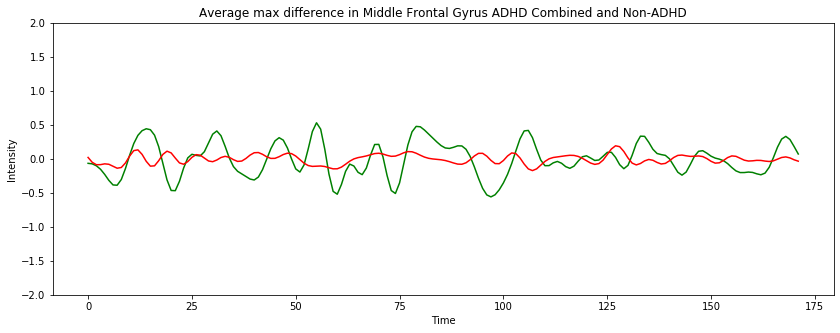

In [36]:
f, ax = plt.subplots(1,1, figsize=(14,5))
x = np.arange(0, 172, 1)
ax.plot(x, adhd_1[mx1], color = 'green')
ax.plot(x, non_adhd[mx1], color = 'red')
plt.ylim(bottom=-2.0)
plt.ylim(top=2.0)
plt.title('Average max difference in Middle Frontal Gyrus ADHD Combined and Non-ADHD')
plt.xlabel('Time')
plt.ylabel('Intensity')

Text(0, 0.5, 'Intensity')

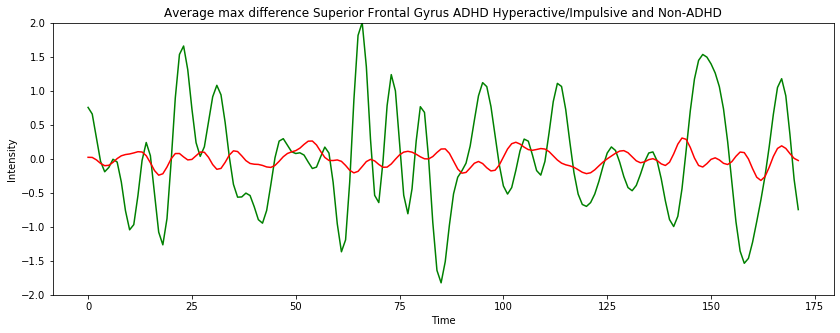

In [37]:
f, ax = plt.subplots(1,1, figsize=(14,5))
x = np.arange(0, 172, 1)
ax.plot(x, adhd_2[mx2], color = 'green')
ax.plot(x, non_adhd[mx2], color = 'red')
#print(all_data[all_data['DX'] == 2][column_names[mx2]])
plt.ylim(bottom=-2.0)
plt.ylim(top=2.0)
plt.title('Average max difference Superior Frontal Gyrus ADHD Hyperactive/Impulsive and Non-ADHD')
plt.xlabel('Time')
plt.ylabel('Intensity')

Text(0, 0.5, 'Intensity')

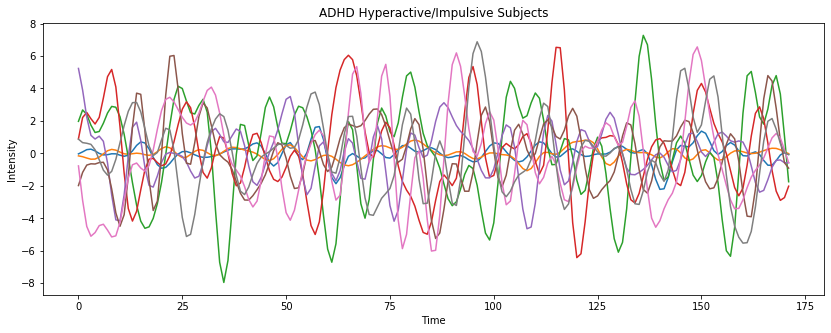

In [38]:
f, ax = plt.subplots(1,1, figsize=(14,5))
x = np.arange(0, 172, 1)
for i in all_data[all_data['DX'] == 2][column_names[mx2]]:
    ax.plot(x, i)
plt.title('ADHD Hyperactive/Impulsive Subjects')
plt.xlabel('Time')
plt.ylabel('Intensity')

Text(0, 0.5, 'Intensity')

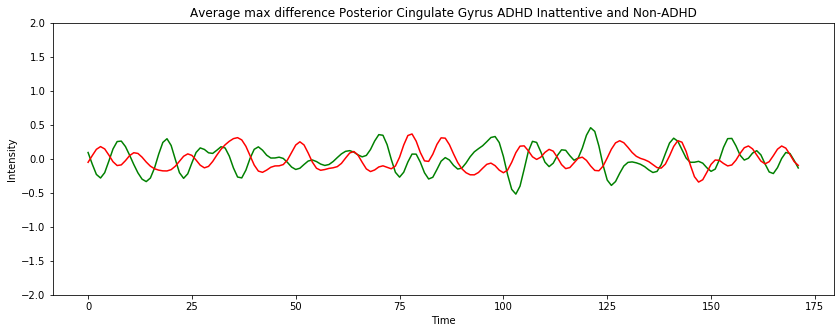

In [39]:
f, ax = plt.subplots(1,1, figsize=(14,5))
x = np.arange(0, 172, 1)
ax.plot(x, adhd_3[mx3], color = 'green')
ax.plot(x, non_adhd[mx3], color = 'red')
plt.ylim(bottom=-2.0)
plt.ylim(top=2.0)
plt.title('Average max difference Posterior Cingulate Gyrus ADHD Inattentive and Non-ADHD')
plt.xlabel('Time')
plt.ylabel('Intensity')

In [40]:
img = nib.load("./nd/sfnwmrda0010001_session_1_rest_1.nii")
first_vol = img.get_data()[:, :, :, 0]


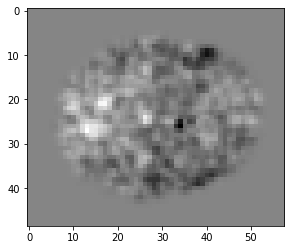

In [41]:
plt.imshow(first_vol[:, :, 20], cmap='gray')

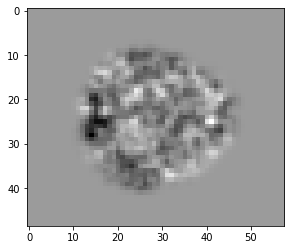

In [42]:
plt.imshow(first_vol[:, :, 30], cmap='gray')

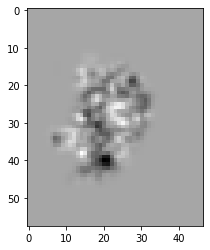

In [43]:
plt.imshow(first_vol[10,:, :], cmap='gray')

In [44]:
all_data.groupby(['DX']).count()

,Site,Gender,Age,Mean_2001,Mean_2002,Mean_2101,Mean_2102,Mean_2111,Mean_2112,Mean_2201,...,Mean_8111,Mean_8112,Mean_8121,Mean_8122,Mean_8201,Mean_8202,Mean_8211,Mean_8212,Mean_8301,Mean_8302
DX,,,,,,,,,,,,,,,,,,,,,
0,237,237,237,237,237,237,237,237,237,237,...,237,237,237,237,237,237,237,237,237,237
1,119,119,119,119,119,119,119,119,119,119,...,119,119,119,119,119,119,119,119,119,119
2,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
3,93,93,93,93,93,93,93,93,93,93,...,93,93,93,93,93,93,93,93,93,93


In [45]:
# https://www.researchgate.net/figure/Brain-regions-in-the-AAL-atlas_fig8_259354957

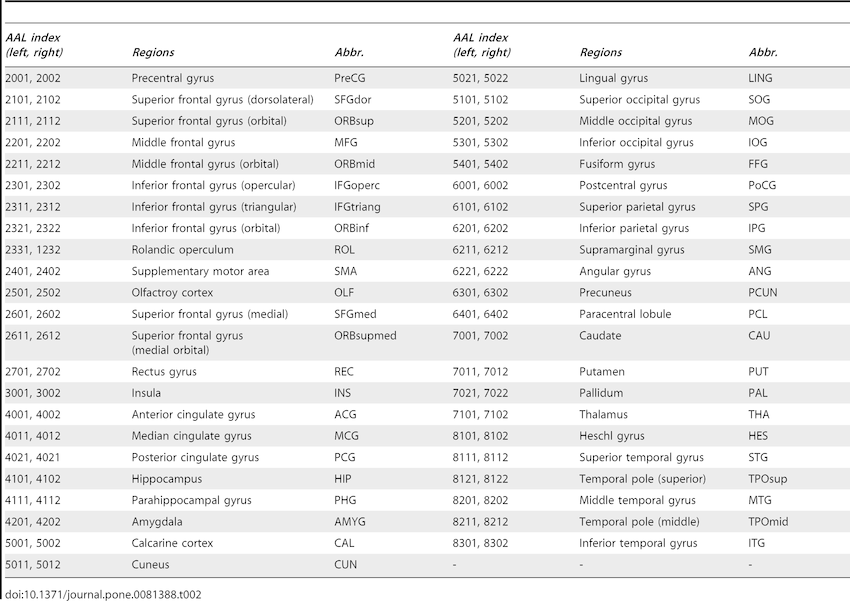

In [46]:
column_names[mx1]

'Mean_2211  '

In [47]:
column_names[mx2]

'Mean_2611  '

In [48]:
column_names[mx3]

'Mean_4021  '

In [49]:
column_names

['Mean_2001  ',
 'Mean_2002  ',
 'Mean_2101  ',
 'Mean_2102  ',
 'Mean_2111  ',
 'Mean_2112  ',
 'Mean_2201  ',
 'Mean_2202  ',
 'Mean_2211  ',
 'Mean_2212  ',
 'Mean_2301  ',
 'Mean_2302  ',
 'Mean_2311  ',
 'Mean_2312  ',
 'Mean_2321  ',
 'Mean_2322  ',
 'Mean_2331  ',
 'Mean_2332  ',
 'Mean_2401  ',
 'Mean_2402  ',
 'Mean_2501  ',
 'Mean_2502  ',
 'Mean_2601  ',
 'Mean_2602  ',
 'Mean_2611  ',
 'Mean_2612  ',
 'Mean_2701  ',
 'Mean_2702  ',
 'Mean_3001  ',
 'Mean_3002  ',
 'Mean_4001  ',
 'Mean_4002  ',
 'Mean_4011  ',
 'Mean_4012  ',
 'Mean_4021  ',
 'Mean_4022  ',
 'Mean_4101  ',
 'Mean_4102  ',
 'Mean_4111  ',
 'Mean_4112  ',
 'Mean_4201  ',
 'Mean_4202  ',
 'Mean_5001  ',
 'Mean_5002  ',
 'Mean_5011  ',
 'Mean_5012  ',
 'Mean_5021  ',
 'Mean_5022  ',
 'Mean_5101  ',
 'Mean_5102  ',
 'Mean_5201  ',
 'Mean_5202  ',
 'Mean_5301  ',
 'Mean_5302  ',
 'Mean_5401  ',
 'Mean_5402  ',
 'Mean_6001  ',
 'Mean_6002  ',
 'Mean_6101  ',
 'Mean_6102  ',
 'Mean_6201  ',
 'Mean_6202  ',
 'Mean_6

In [56]:
plotting.view_img(img.slicer[:, :, :, 0], threshold=.5)